# Design and Develop a machine learning model for E-Commerce applications

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.shape

(8807, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
showtype = data['type'].value_counts().reset_index()

In [7]:
showtype

,type,count
0,Movie,6131
1,TV Show,2676


In [8]:
country_counts=data['country'].value_counts().head(20).reset_index(name='count')
country_counts.index = range(1,len(country_counts)+1)
country_counts

,country,count
1,United States,2818
2,India,972
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110
10,Egypt,106


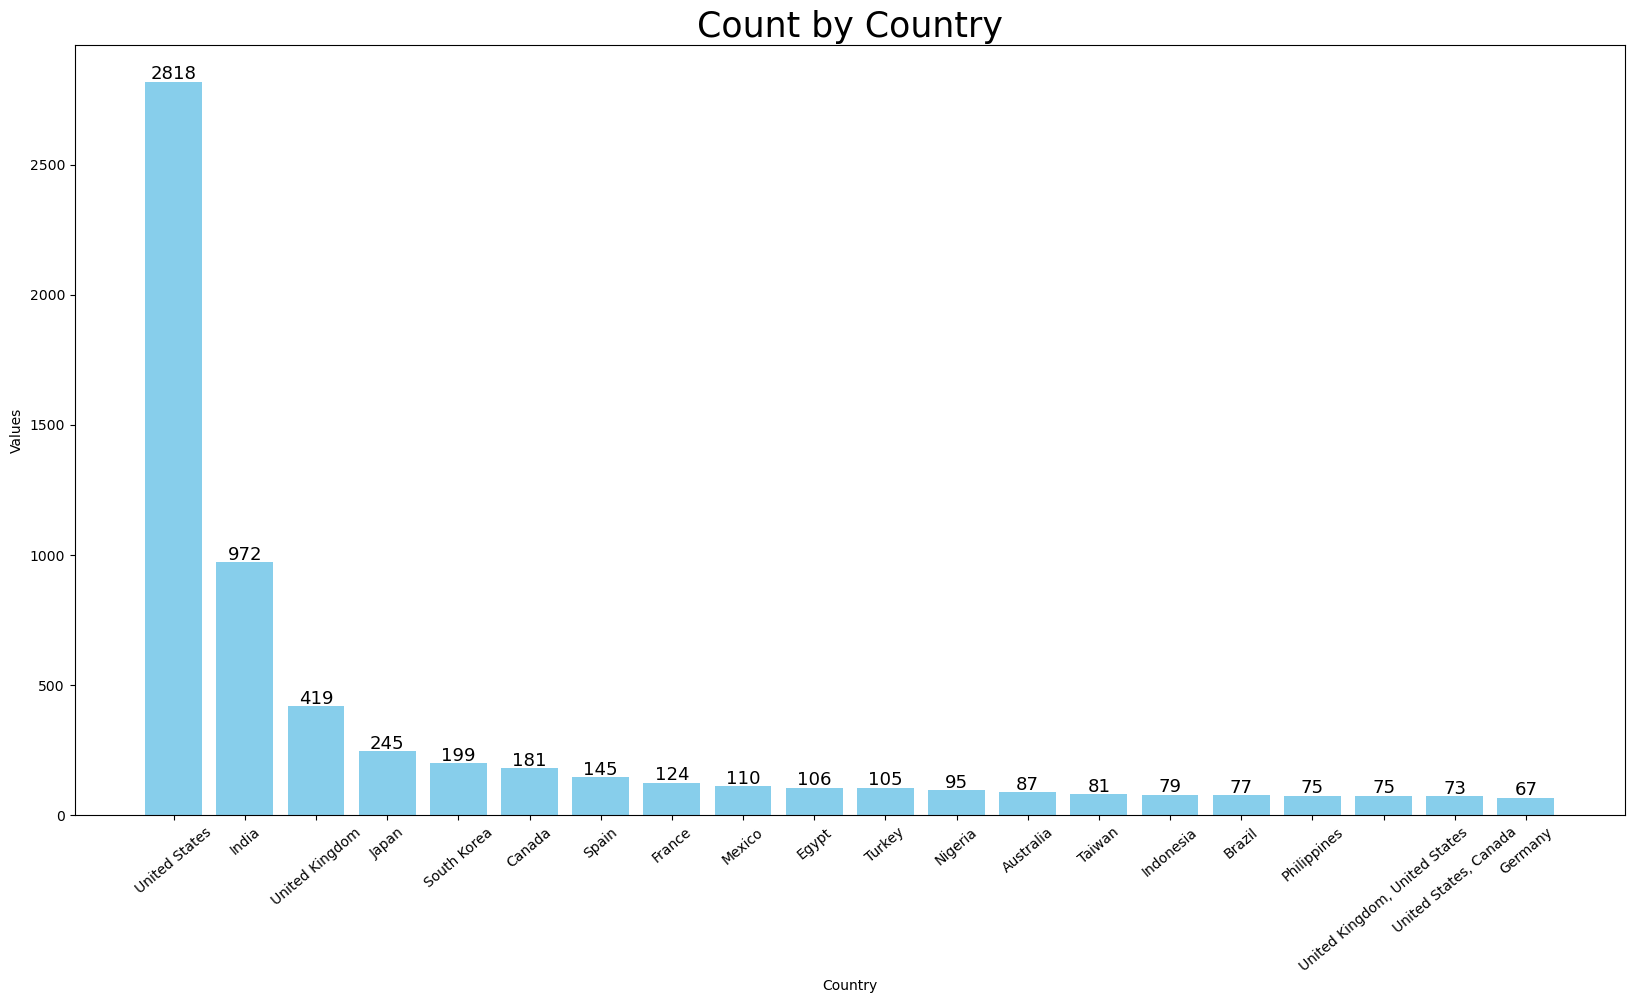

In [9]:
plt.figure(figsize = (20,10))
plt.bar(country_counts['country'],country_counts['count'],color = 'skyblue')
for i,count in enumerate(country_counts['count']):
    plt.text(i,count+10,str(count),ha='center',fontsize=13)
plt.xticks(rotation=40)
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Count by Country',fontsize =25)
plt.show()

In [10]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
num_cols = [col for col in data.columns if data[col].dtype!="object"] 

In [12]:
imputer1 = SimpleImputer(strategy="most_frequent")   ##To fill Categorical Features.
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.

In [13]:
def fill_missing_no(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [14]:
fill_missing_no(data)

In [15]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
data_copy = data.copy()

In [17]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007.0,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,"July 1, 2019",2018.0,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009.0,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006.0,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [18]:
le = LabelEncoder()
str_col = data.select_dtypes(include = ('object')).columns
for i in str_col:
    data[i] = le.fit_transform(data[i].astype('str'))

In [19]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,1699,603,1711,2020.0,7,210,274,2577
1,1111,1,1091,3392,409,426,1706,2021.0,11,110,414,1762
2,2222,1,2651,2105,6296,603,1706,2021.0,11,0,242,7341
3,3333,1,3506,3392,1699,603,1706,2021.0,11,0,297,3617
4,4444,1,3861,3392,4815,251,1706,2021.0,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,1419,2007.0,8,70,269,895
8803,8672,1,8773,3392,1699,603,788,2018.0,14,110,424,8483
8804,8673,0,8774,3631,3231,603,1366,2009.0,8,206,207,5228
8805,8674,0,8777,3247,7061,603,665,2006.0,6,206,125,3315


In [20]:
data['show_id'].unique()

array([   0, 1111, 2222, ..., 8673, 8674, 8675])

In [21]:
X = data.drop(['type'] , axis=1)
y = data['type']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
ml_model = RandomForestRegressor()

In [24]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [25]:
y_pred = ml_model.predict(X_test)

In [26]:
metrics.r2_score(y_test , y_pred)

0.9591178894076157

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['show_id', 'type']:  # Label Encoding
    data_copy[col] = le.fit_transform(data_copy[col])
def target_guided_encoding(i_col, t_col): # Target guided encoding
    i_col_index = data_copy.groupby([i_col])[t_col].mean().sort_values().index
    i_col_dict = {key:index for index , key in enumerate(i_col_index , 0)}
    data_copy[i_col] = data_copy[i_col].map(i_col_dict) 

target_guided_encoding('title', 'type')
target_guided_encoding('director', 'type')
target_guided_encoding('cast', 'type')
target_guided_encoding('country', 'type')
target_guided_encoding('rating', 'type')
target_guided_encoding('duration', 'type')
target_guided_encoding('listed_in', 'type')
target_guided_encoding('description', 'type')

In [28]:
data_copy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,4445,805,5421,593,"September 25, 2021",2020.0,1,68,30,3913
1,1111,1,8252,4353,5711,571,"September 24, 2021",2021.0,12,216,316,7914
2,2222,1,7327,4323,5657,593,"September 24, 2021",2021.0,12,205,493,6707
3,3333,1,6859,4353,5421,593,"September 24, 2021",2021.0,12,205,417,7546
4,4444,1,6688,4353,7339,558,"September 24, 2021",2021.0,12,216,453,7167
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,2411,2750,95,593,"November 20, 2019",2007.0,8,192,35,4631
8803,8672,1,6815,4353,5421,593,"July 1, 2019",2018.0,16,216,295,6571
8804,8673,0,2409,1728,1039,593,"November 1, 2019",2009.0,8,76,64,355
8805,8674,0,2407,324,1725,593,"January 11, 2020",2006.0,2,76,274,5418


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ml_model = RandomForestRegressor()

In [30]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [31]:
y_pred = ml_model.predict(X_test)

In [32]:
metrics.r2_score(y_test , y_pred) * 100

95.99126322494446